In [1]:
from explann.doe import FullFactorial, CentralCompositeDesign, LatinHypercubeSampling

variables = {
    't': [0.001, 0.010],                #Thickness
    'c': [-0.01255805, 0.0],            #cp
    'T': [400.0, 650.0],                #T0in
    'p': [4.0e5, 1.0e6],                #p0in
    'T_e': [290.0, 400.0],               #outerTemperature
}


ccd = CentralCompositeDesign(
    variables=variables,
    center=(1,0),
    alpha='r',
    face='ccc',
)
ccd.doe

,t,c,T,p,T_e
Index,,,,,
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
4,1.000000,1.000000,-1.000000,-1.000000,-1.000000
5,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
6,1.000000,-1.000000,1.000000,-1.000000,-1.000000
7,-1.000000,1.000000,1.000000,-1.000000,-1.000000
8,1.000000,1.000000,1.000000,-1.000000,-1.000000
9,-1.000000,-1.000000,-1.000000,1.000000,-1.000000


In [138]:
import sys
sys.path.append('/home/ppiper/Dropbox/local/github/frog')

from frog.datahandler import HDF5Handler, sliceDataAlongAxis

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from frog.normalization import Normalization, DataHandlerNormalization

hfdh = HDF5Handler(
    datapath='/home/ppiper/Dropbox/local/github/explann/data/experimental_planning_T0in_limit_clear/hf_transpose.h5',
    datasets = ['Heat_Flux_UPPER_WALL', 'Mach', 'Pressure', 'Temperature', 'Temperature_Solid', 'Temperature_Solid_INNERWALL'],
    #datasets = ['Temperature'],
)

y_rom = Pipeline([
    #('scaler', StandardScaler()),
    ('scaler', Normalization(bounds=[-1,1])),
    #('scaler', DataHandlerNormalization(datahandler=hfdh, bounds=[0,1])),
    #('scaler', RobustScaler()),
    ('pca', PCA(n_components=10)),
])

y_rom.fit(hfdh.data)

Pipeline(steps=[('scaler', Normalization()), ('pca', PCA(n_components=10))])

In [139]:
import pickle
with open('/home/ppiper/Dropbox/local/github/explann/data/experimental_planning_T0in_limit_clear/rom.pkl','wb') as f:
    pickle.dump(y_rom,f)

with open('/home/ppiper/Dropbox/local/github/explann/data/experimental_planning_T0in_limit_clear/rom.pkl','rb') as f:
    rom = pickle.load(f)

In [140]:
pc = rom.transform(hfdh.data)

In [141]:
ccd = CentralCompositeDesign(
    variables=variables,
    center=(1,0),
    alpha='r',
    face='ccc',
)

import pandas as pd
results = {f'L{i}': pc[:,i] for i in range(pc.shape[1])}

ccd.append_results(results)
ccd.doe

,t,c,T,p,T_e,L0,L1,L2,L3,L4,L5,L6,L7,L8,L9
Index,,,,,,,,,,,,,,,
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,47.655208,-2.574525,1.054864,0.116466,0.006886,0.026542,-0.019255,0.012261,-0.003517,-0.003013
2,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,47.657308,-2.584284,1.705080,-0.057877,0.004462,0.046149,-0.004435,-0.013983,0.008446,-0.001133
3,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,47.482853,2.523185,1.070312,0.115771,0.007093,0.020386,-0.025199,0.005370,-0.005530,-0.004666
4,1.000000,1.000000,-1.000000,-1.000000,-1.000000,47.484867,2.512161,1.748841,-0.031342,0.003471,0.026343,-0.011534,-0.007418,0.008019,-0.007382
5,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,47.629272,-2.501821,-1.897897,0.122485,-0.010489,-0.061067,0.013869,0.004764,0.001125,-0.008234
6,1.000000,-1.000000,1.000000,-1.000000,-1.000000,47.632879,-2.517772,-0.854666,-0.157822,-0.009886,-0.029965,0.015498,-0.008033,0.008307,0.003685
7,-1.000000,1.000000,1.000000,-1.000000,-1.000000,47.456260,2.599557,-1.962213,0.058714,-0.004065,-0.022829,-0.001661,-0.012595,-0.013704,0.005997
8,1.000000,1.000000,1.000000,-1.000000,-1.000000,47.459997,2.581783,-0.875525,-0.179893,-0.005059,-0.016389,-0.003456,-0.008670,-0.003721,0.009605
9,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-47.418552,-3.711689,1.184190,0.148468,0.003752,-0.001800,0.000860,0.003282,-0.012650,0.009544


In [142]:
from explann.models import FactorialModel

ffm = FactorialModel(
    data = ccd.doe,
    functions = {
        'L0': 'L0 ~ t*c*T*p*T_e + np.power(t,2) + np.power(c,2) + np.power(T,2) + np.power(p,2) + np.power(T_e,2) + np.power(t,2)*np.power(c,2) + np.power(t,2)*np.power(T,2) + np.power(t,2)*np.power(p,2) + np.power(t,2)*np.power(T_e,2) + np.power(c,2)*np.power(T,2) + np.power(c,2)*np.power(p,2) + np.power(c,2)*np.power(T_e,2) + np.power(T,2)*np.power(p,2) + np.power(T,2)*np.power(T_e,2) + np.power(p,2)*np.power(T_e,2)',
        'L1': 'L1 ~ t*c*T*p*T_e + np.power(t,2) + np.power(c,2) + np.power(T,2) + np.power(p,2) + np.power(T_e,2) + np.power(t,2)*np.power(c,2) + np.power(t,2)*np.power(T,2) + np.power(t,2)*np.power(p,2) + np.power(t,2)*np.power(T_e,2) + np.power(c,2)*np.power(T,2) + np.power(c,2)*np.power(p,2) + np.power(c,2)*np.power(T_e,2) + np.power(T,2)*np.power(p,2) + np.power(T,2)*np.power(T_e,2) + np.power(p,2)*np.power(T_e,2)',
        'L2': 'L2 ~ t*c*T*p*T_e + np.power(t,2) + np.power(c,2) + np.power(T,2) + np.power(p,2) + np.power(T_e,2) + np.power(t,2)*np.power(c,2) + np.power(t,2)*np.power(T,2) + np.power(t,2)*np.power(p,2) + np.power(t,2)*np.power(T_e,2) + np.power(c,2)*np.power(T,2) + np.power(c,2)*np.power(p,2) + np.power(c,2)*np.power(T_e,2) + np.power(T,2)*np.power(p,2) + np.power(T,2)*np.power(T_e,2) + np.power(p,2)*np.power(T_e,2)',
        'L3': 'L3 ~ t*c*T*p*T_e + np.power(t,2) + np.power(c,2) + np.power(T,2) + np.power(p,2) + np.power(T_e,2) + np.power(t,2)*np.power(c,2) + np.power(t,2)*np.power(T,2) + np.power(t,2)*np.power(p,2) + np.power(t,2)*np.power(T_e,2) + np.power(c,2)*np.power(T,2) + np.power(c,2)*np.power(p,2) + np.power(c,2)*np.power(T_e,2) + np.power(T,2)*np.power(p,2) + np.power(T,2)*np.power(T_e,2) + np.power(p,2)*np.power(T_e,2)',
        'L4': 'L4 ~ t*c*T*p*T_e + np.power(t,2) + np.power(c,2) + np.power(T,2) + np.power(p,2) + np.power(T_e,2) + np.power(t,2)*np.power(c,2) + np.power(t,2)*np.power(T,2) + np.power(t,2)*np.power(p,2) + np.power(t,2)*np.power(T_e,2) + np.power(c,2)*np.power(T,2) + np.power(c,2)*np.power(p,2) + np.power(c,2)*np.power(T_e,2) + np.power(T,2)*np.power(p,2) + np.power(T,2)*np.power(T_e,2) + np.power(p,2)*np.power(T_e,2)', 
    }
)

ffm = FactorialModel(
    data = ccd.doe,
    functions = {
        'L0': 'L0 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)',
        'L1': 'L1 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)',
        'L2': 'L2 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)',
        'L3': 'L3 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)',
        'L4': 'L4 ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)', 
    },
    levels = ccd.levels,
)

ffm = FactorialModel(
    data = ccd.doe,
    functions = {f'{key}': f'{key} ~ 1 + t + c + T + t:T + c:T + p + t:p + T:p + np.power(t, 2) + np.power(p, 2)' for key in results.keys()},
    levels = ccd.levels,
)

In [156]:
sig_ffm= ffm.build_significant_models()
#sig_ffm= ffm
sig_ffm.summary()

{'L0': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                     L0   R-squared:                       1.000
 Model:                            OLS   Adj. R-squared:                  1.000
 Method:                 Least Squares   F-statistic:                 2.655e+07
 Date:                Wed, 16 Aug 2023   Prob (F-statistic):          4.56e-123
 Time:                        00:21:16   Log-Likelihood:                 85.152
 No. Observations:                  43   AIC:                            -162.3
 Df Residuals:                      39   BIC:                            -155.3
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------

In [157]:
ffm.get_significant_model_functions()

{'L0': 'L0 ~ c + T + p',
 'L1': 'L1 ~ c',
 'L2': 'L2 ~ t + c + T + t:T + c:T + t:p + T:p + np.power(t, 2) + np.power(p, 2)',
 'L3': 'L3 ~ 1 + t + T + t:T + c:T + t:p + T:p + np.power(t, 2)',
 'L4': 'L4 ~ 1 + np.power(p, 2)',
 'L5': 'L5 ~ c:T + t:p + T:p + np.power(p, 2)',
 'L6': 'L6 ~ 1 + t:T + T:p + np.power(p, 2)',
 'L7': 'L7 ~ 1 + t:T + t:p',
 'L8': 'L8 ~ 1 + t + t:T + c:T + t:p + T:p + np.power(t, 2)',
 'L9': 'L9 ~ 1 + t:T + c:T + t:p + T:p + np.power(t, 2)'}

In [158]:
import numpy as np

# equivalent to the case 10 of lhs
independent_vars = {
        't': 0.006044329228014826,
        'c': -0.001277584765410799,
        'T': 616.0,
        'p': 456429.13834591914,
        'T_e': 318.0
    }

independent_vars_coded = {}
for var, value in independent_vars.items():
    independent_vars_coded[var] = np.interp(value,  ccd.levels[f'{var}'].values, ccd.levels.index.values)
print(independent_vars_coded)

L_predicted = []
for dependent in ['L0', 'L1', 'L2', 'L3', 'L4']:
    L_predicted.append(ffm[dependent].predict(independent_vars_coded).item())

L_predicted = np.array(L_predicted)

{'t': 0.2876978626040751, 'c': 1.8944814878852547, 'T': 1.7314855594439613, 'p': -1.9310413445758425, 'T_e': -1.167585167457216}


In [159]:
ffm.dependent_variables

['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9']

In [160]:
def surrogate(model, variables, rom=None):
    independent_vars_coded = {}
    independent_vars = variables.copy()
    for var, value in independent_vars.items():
        independent_vars_coded[var] = np.interp(value,  model.levels[f'{var}'].values, model.levels.index.values)

    L_predicted = []
    for dependent in model.dependent_variables:
        L_predicted.append(model[dependent].predict(independent_vars_coded).item())

    L_predicted = np.array(L_predicted)

    if rom is not None:
        L_predicted = rom.inverse_transform(L_predicted)

    return L_predicted
    


In [161]:
import pyvista as pv

mesh = pv.read('/home/ppiper/Dropbox/local/github/explann/data/experimental_planning_T0in_limit_clear/1/SU2/outputs/cht_setupSU2.vtm')
mesh_original = pv.read('/home/ppiper/Dropbox/local/github/explann/data/lhs/10/SU2/outputs/cht_setupSU2.vtm')


In [162]:
#mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal']['Temperature']=svd.reconstruct(L_predicted)

surrogate_solution = surrogate(
    model=ffm,
    variables={
        't': 0.006044329228014826,
        'c': -0.001277584765410799,
        'T': 616.0,
        'p': 456429.13834591914,
        'T_e': 318.0
    },
    rom=y_rom)

inverse_transform


In [163]:
hfdh(surrogate_solution)['Temperature']

array([394.43710131, 350.45249259, 394.43710131, ..., 378.27208848,
       369.17676912, 359.20965214])

In [164]:
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal']['Temperature']=hfdh(surrogate_solution)['Temperature']

/home/ppiper/micromamba/envs/explann/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


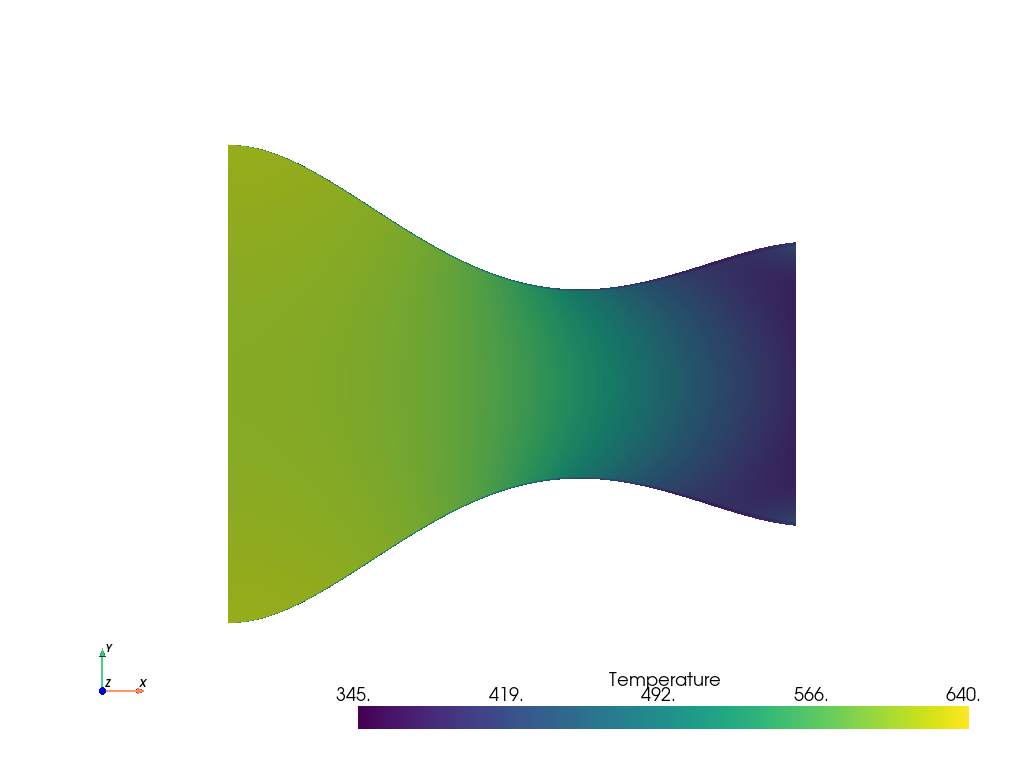

In [165]:
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal'].set_active_scalars('Temperature')
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal'].plot(cpos='xy')

/home/ppiper/micromamba/envs/explann/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


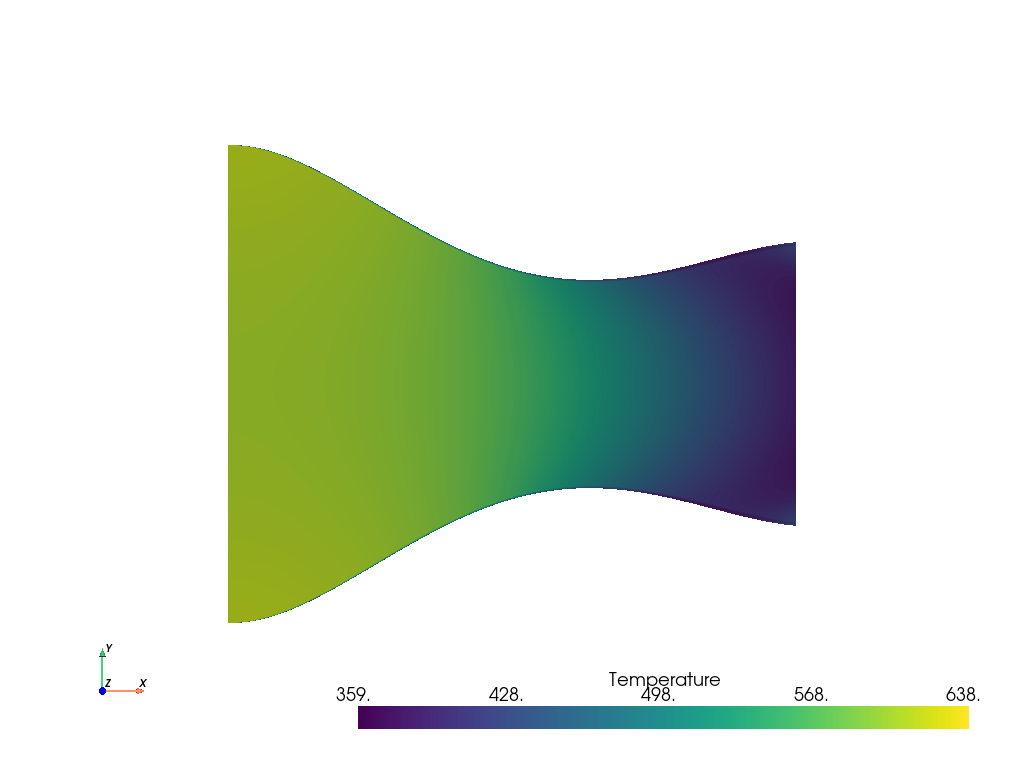

In [166]:
mesh_original['Zone 0 (Comp. Fluid)']['Internal']['Internal'].set_active_scalars('Temperature')
mesh_original['Zone 0 (Comp. Fluid)']['Internal']['Internal'].plot(cpos='xy')

/home/ppiper/micromamba/envs/explann/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


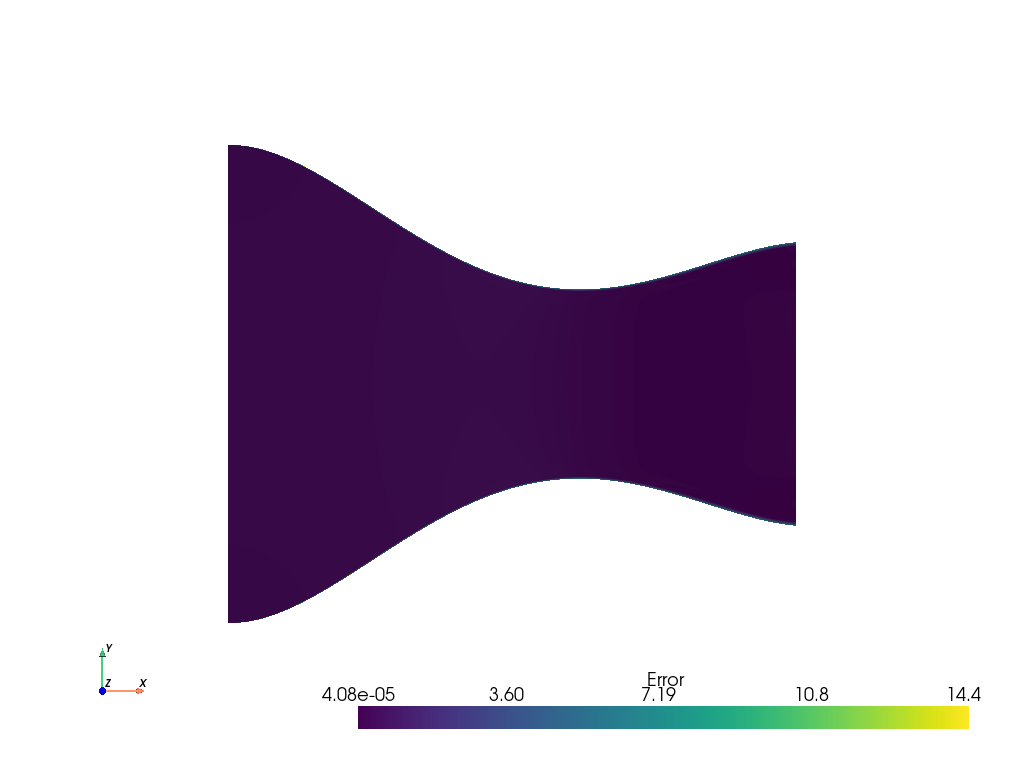

In [168]:
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal'].set_active_scalars('Error')
mesh['Zone 0 (Comp. Fluid)']['Internal']['Internal'].plot(cpos='xy')

In [101]:
ccd.levels

,t,c,T,p,T_e
Levels,,,,,
-2.378414,0.001000,-0.012558,400.000000,400000.000000,290.000000
-1.000000,0.003608,-0.008919,472.443974,573865.537712,321.875349
0.000000,0.005500,-0.006279,525.000000,700000.000000,345.000000
1.000000,0.007392,-0.003639,577.556026,826134.462288,368.124651
2.378414,0.010000,0.000000,650.000000,1000000.000000,400.000000


In [68]:
T_surrogate=surrogate(
    model=ffm,
    variables={
        't': 0.006044329228014826,
        'c': -0.001277584765410799,
        'T': 616.0,
        'p': 456429.13834591914,
        #'T_e': 318.0
    },
    svd=svd)

In [104]:
T_surrogate[46553]

494.7056527855523

In [103]:
def get_variable_at_position(variable, mesh, position):
    idx = mesh.find_closest_cell(position)
    print(idx)
    return mesh[variable][idx]

get_variable_at_position('Temperature', mesh[0][0][0], [0.1, 0.0, 0.0])

46553


494.7056527855523

In [97]:
dir(mesh[0][0][0])

['ALL_PIECES_EXTENT',
 'AddObserver',
 'AddReferenceToCell',
 'Allocate',
 'AllocateCellGhostArray',
 'AllocateEstimate',
 'AllocateExact',
 'AllocatePointGhostArray',
 'AttributeTypes',
 'BOUNDING_BOX',
 'BreakOnError',
 'BuildCellLocator',
 'BuildLinks',
 'BuildLocator',
 'BuildPointLocator',
 'CELL',
 'CELL_DATA_FIELD',
 'CELL_DATA_VECTOR',
 'CheckAttributes',
 'ComputeBounds',
 'ConvertFaceStreamPointIds',
 'CopyAttributes',
 'CopyInformationFromPipeline',
 'CopyInformationToPipeline',
 'CopyStructure',
 'Crop',
 'DATA_EXTENT',
 'DATA_EXTENT_TYPE',
 'DATA_NUMBER_OF_GHOST_LEVELS',
 'DATA_NUMBER_OF_PIECES',
 'DATA_OBJECT',
 'DATA_OBJECT_FIELD',
 'DATA_PIECE_NUMBER',
 'DATA_TIME_STEP',
 'DATA_TYPE_NAME',
 'DIRECTION',
 'DataHasBeenGenerated',
 'DebugOff',
 'DebugOn',
 'DecomposeAPolyhedronCell',
 'DeepCopy',
 'EDGE',
 'EDGE_DATA_VECTOR',
 'EditableOff',
 'EditableOn',
 'ExtendedNew',
 'FIELD',
 'FIELD_ACTIVE_ATTRIBUTE',
 'FIELD_ARRAY_TYPE',
 'FIELD_ASSOCIATION',
 'FIELD_ASSOCIATION_CE

In [171]:
p = pv.Plotter()
p.add_mesh(mesh[0][0][0], scalars='Temperature')
p.add_mesh(mesh[1][0][0], scalars='Temperature')

#p.add_mesh(mesh[0][0][0]['Temperature'][164], color='red')
p.add_points(np.array([0.1,0,0]), render_points_as_spheres=True)
p.show_bounds(
    n_xlabels=2,
    n_ylabels=2,
    n_zlabels=2,
)
p.show(cpos='xy')

KeyError: 'Data array (Temperature) not present in this dataset.'